### LightGBM 

In [4]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data=load_breast_cancer()
ftr=data.data
target=data.target

X_train,X_test,y_train,y_test=train_test_split(ftr,target,test_size=0.2,random_state=156)

lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(X_test,y_test)]

lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                eval_set = evals, verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [7]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score
    confusion=confusion_matrix(y_test,pred)
    accuracy=round(accuracy_score(y_test,pred),4)
    precision=round(precision_score(y_test,pred),4)
    recall=round(recall_score(y_test,pred),4)
    f1=round(f1_score(y_test,pred),4)
    roc_score=round(roc_auc_score(y_test,pred),4)
    
    print('오차행렬')
    print(confusion,'\n')
    print(f'정확도 :{accuracy}, 정밀도: {precision}, 재현율: {recall}, F1 스코어: {f1}, ROC AUC: {roc_score}\n')
    

In [8]:
get_clf_eval(y_test,preds)

오차행렬
[[33  4]
 [ 2 75]] 

정확도 :0.9474, 정밀도: 0.9494, 재현율: 0.974, F1 스코어: 0.9615, ROC AUC: 0.933



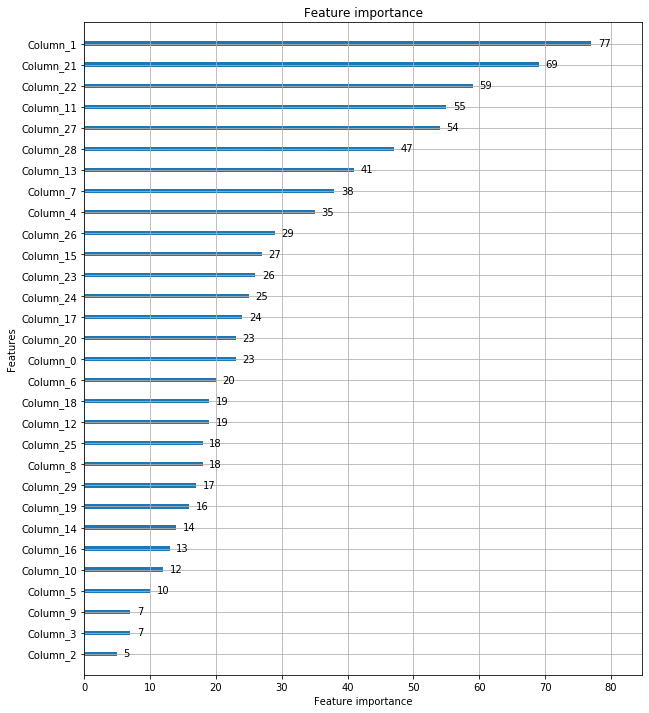

In [11]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

f,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax);

### 분류 실습 -캐글 산탄데르 고객 만족 예측

In [13]:
df=pd.read_csv('./santander-customer-satisfaction/train_santander.csv',encoding='latin-1')
print('dataset_shape:',df.shape)
df.head()

dataset_shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,...,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,27,3,18,48,0,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,3,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [114]:
test=pd.read_csv('./santander-customer-satisfaction/test.csv',encoding='latin-1')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 369 entries, var3 to var38
dtypes: float64(110), int64(259)
memory usage: 213.4 MB


In [54]:
test.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,...,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.00000,75818.000000,75818.000000,75818.000000,75818.000000,75818.0,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.0,75818.0,75818.0,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.0,75818.0,75818.000000,75818.000000,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04,7.581800e+04,7.581800e+04,7.581800e+04,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04,75818.000000,7.581800e+04,75818.000000,75818.000000,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.0,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,3.635893,69.734376,115.469593,67.439982,110.967136,137.214620,67.910627,111.63958,140.850513,4.

In [16]:
df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [20]:
round(df[df['TARGET']==1].TARGET.count()/df[df['TARGET']==0].TARGET.count(),2)

0.04

In [21]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,...,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.0,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.

#### var3 min값이 -999999이다. 결측치를 의미함, 그래서 가장 빈도수가 높은 2로 대체한다

#### 그리고 ID 칼럼 삭제

In [23]:
df['var3'].replace(-999999,2,inplace=True)
df.drop('ID',axis=1,inplace=True)

In [55]:
test['var3'].replace(-999999,2,inplace=True)

In [115]:
test_id=test['ID']

In [116]:
test.drop('ID',axis=1,inplace=True)

In [99]:
type(test_id)

pandas.core.frame.DataFrame

In [25]:
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,...,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,27,3,18,48,0,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,3,6,3,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
X_feature=df.iloc[:,:-1]
y_label=df.iloc[:,-1]

print(X_feature.shape)

(76020, 369)


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_feature,y_label,test_size=0.2,random_state=0)

train_cnt=y_train.count()
test_cnt=y_test.count()

print(f'train shape:{X_train.shape}, test shape:{X_test.shape}')
print(f'train_dist:\n {y_train.value_counts()/train_cnt}\n test_dist:\n {y_test.value_counts()/test_cnt}')

train shape:(60816, 369), test shape:(15204, 369)
train_dist:
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64
 test_dist:
 0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf=XGBClassifier(n_estimators=500,random_state=155)

xgb_clf.fit(X_train,y_train,early_stopping_rounds=100,
           eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(f'ROC_AUC: {xgb_roc_score}')

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

#### 하이퍼 파라미터 튜닝

In [35]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


xgb_clf=XGBClassifier(n_estimators=100)
params={'max_depth':[5,7],'min_child_wright':[1,3],'colsample_bytree':[0.5,0.75]}

# cv는 3
gridcv=GridSearchCV(xgb_clf,param_grid=params,cv=3)
gridcv.fit(X_train,y_train,early_stopping_rounds=30,eval_metric='auc',
          eval_set=[(X_train,y_train),(X_test,y_test)])

print(f'GridSearchCV 최적 파라미터: {gridcv.best_params_}')

xgb_roc_score=roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print(f'ROC_AUC: {xgb_roc_score}')

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

[51]	validation_0-auc:0.86387	validation_1-auc:0.843007
[52]	validation_0-auc:0.864428	validation_1-auc:0.843608
[53]	validation_0-auc:0.86492	validation_1-auc:0.843887
[54]	validation_0-auc:0.865341	validation_1-auc:0.844128
[55]	validation_0-auc:0.865713	validation_1-auc:0.843955
[56]	validation_0-auc:0.866165	validation_1-auc:0.844301
[57]	validation_0-auc:0.866538	validation_1-auc:0.84439
[58]	validation_0-auc:0.86671	validation_1-auc:0.844055
[59]	validation_0-auc:0.866977	validation_1-auc:0.843974
[60]	validation_0-auc:0.867483	validation_1-auc:0.8439
[61]	validation_0-auc:0.867853	validation_1-auc:0.843561
[62]	validation_0-auc:0.86811	validation_1-auc:0.843594
[63]	validation_0-auc:0.868319	validation_1-auc:0.843498
[64]	validation_0-auc:0.868554	validation_1-auc:0.843615
[65]	validation_0-auc:0.869021	validation_1-auc:0.843756
[66]	validation_0-auc:0.869095	validation_1-auc:0.843781
[67]	validation_0-auc:0.869277	validation_1-auc:0.843635
[68]	validation_0-auc:0.869639	validat

[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.826745
[15]	validation_0-auc:0.832662	validation_1-auc:0.82862
[16]	validation_0-auc:0.836402	validation_1-auc:0.830562
[17]	validation_0-auc:0.839389	validation_1-auc:0.833342
[18]	validation_0-auc:0.840935	validation

[55]	validation_0-auc:0.865713	validation_1-auc:0.843955
[56]	validation_0-auc:0.866165	validation_1-auc:0.844301
[57]	validation_0-auc:0.866538	validation_1-auc:0.84439
[58]	validation_0-auc:0.86671	validation_1-auc:0.844055
[59]	validation_0-auc:0.866977	validation_1-auc:0.843974
[60]	validation_0-auc:0.867483	validation_1-auc:0.8439
[61]	validation_0-auc:0.867853	validation_1-auc:0.843561
[62]	validation_0-auc:0.86811	validation_1-auc:0.843594
[63]	validation_0-auc:0.868319	validation_1-auc:0.843498
[64]	validation_0-auc:0.868554	validation_1-auc:0.843615
[65]	validation_0-auc:0.869021	validation_1-auc:0.843756
[66]	validation_0-auc:0.869095	validation_1-auc:0.843781
[67]	validation_0-auc:0.869277	validation_1-auc:0.843635
[68]	validation_0-auc:0.869639	validation_1-auc:0.843286
[69]	validation_0-auc:0.869756	validation_1-auc:0.843157
[70]	validation_0-auc:0.869923	validation_1-auc:0.843385
[71]	validation_0-auc:0.870143	validation_1-auc:0.843476
[72]	validation_0-auc:0.870491	valid

[5]	validation_0-auc:0.819568	validation_1-auc:0.81934
[6]	validation_0-auc:0.819199	validation_1-auc:0.818772
[7]	validation_0-auc:0.827364	validation_1-auc:0.826183
[8]	validation_0-auc:0.831947	validation_1-auc:0.829293
[9]	validation_0-auc:0.832248	validation_1-auc:0.827116
[10]	validation_0-auc:0.836511	validation_1-auc:0.829685
[11]	validation_0-auc:0.841032	validation_1-auc:0.831312
[12]	validation_0-auc:0.843673	validation_1-auc:0.831989
[13]	validation_0-auc:0.843697	validation_1-auc:0.832132
[14]	validation_0-auc:0.843356	validation_1-auc:0.830392
[15]	validation_0-auc:0.846759	validation_1-auc:0.832371
[16]	validation_0-auc:0.849031	validation_1-auc:0.835084
[17]	validation_0-auc:0.851348	validation_1-auc:0.836316
[18]	validation_0-auc:0.85355	validation_1-auc:0.836325
[19]	validation_0-auc:0.852407	validation_1-auc:0.835902
[20]	validation_0-auc:0.855592	validation_1-auc:0.836894
[21]	validation_0-auc:0.855578	validation_1-auc:0.836338
[22]	validation_0-auc:0.855055	validat

[84]	validation_0-auc:0.895174	validation_1-auc:0.843781
[85]	validation_0-auc:0.895171	validation_1-auc:0.844018
[86]	validation_0-auc:0.895293	validation_1-auc:0.843721
[87]	validation_0-auc:0.895377	validation_1-auc:0.843689
[88]	validation_0-auc:0.895614	validation_1-auc:0.8435
[89]	validation_0-auc:0.895597	validation_1-auc:0.84341
[90]	validation_0-auc:0.896023	validation_1-auc:0.843738
[91]	validation_0-auc:0.896194	validation_1-auc:0.843675
[92]	validation_0-auc:0.896304	validation_1-auc:0.843666
[93]	validation_0-auc:0.896388	validation_1-auc:0.8436
[94]	validation_0-auc:0.89645	validation_1-auc:0.843586
[95]	validation_0-auc:0.896973	validation_1-auc:0.843312
[96]	validation_0-auc:0.897076	validation_1-auc:0.843296
[97]	validation_0-auc:0.897856	validation_1-auc:0.843375
Stopping. Best iteration:
[67]	validation_0-auc:0.890589	validation_1-auc:0.845307

[0]	validation_0-auc:0.736837	validation_1-auc:0.734096
Multiple eval metrics have been passed: 'validation_1-auc' will be u

[24]	validation_0-auc:0.859067	validation_1-auc:0.837898
[25]	validation_0-auc:0.859464	validation_1-auc:0.836324
[26]	validation_0-auc:0.860391	validation_1-auc:0.836256
[27]	validation_0-auc:0.862288	validation_1-auc:0.837648
[28]	validation_0-auc:0.864212	validation_1-auc:0.837832
[29]	validation_0-auc:0.863904	validation_1-auc:0.837949
[30]	validation_0-auc:0.865373	validation_1-auc:0.838325
[31]	validation_0-auc:0.866804	validation_1-auc:0.839286
[32]	validation_0-auc:0.867114	validation_1-auc:0.838461
[33]	validation_0-auc:0.867559	validation_1-auc:0.837837
[34]	validation_0-auc:0.867666	validation_1-auc:0.836562
[35]	validation_0-auc:0.869961	validation_1-auc:0.836628
[36]	validation_0-auc:0.871011	validation_1-auc:0.836577
[37]	validation_0-auc:0.870972	validation_1-auc:0.836148
[38]	validation_0-auc:0.871422	validation_1-auc:0.835722
[39]	validation_0-auc:0.871905	validation_1-auc:0.835613
[40]	validation_0-auc:0.872281	validation_1-auc:0.834827
[41]	validation_0-auc:0.872395	

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822075	validation_1-auc:0.815713
[2]	validation_0-auc:0.814378	validation_1-auc:0.806912
[3]	validation_0-auc:0.828328	validation_1-auc:0.821227
[4]	validation_0-auc:0.832905	validation_1-auc:0.82557
[5]	validation_0-auc:0.82954	validation_1-auc:0.82286
[6]	validation_0-auc:0.830212	validation_1-auc:0.822257
[7]	validation_0-auc:0.83366	validation_1-auc:0.825984
[8]	validation_0-auc:0.839052	validation_1-auc:0.82913
[9]	validation_0-auc:0.838785	validation_1-auc:0.828546
[10]	validation_0-auc:0.843474	validation_1-auc:0.83089
[11]	validation_0-auc:0.845716	validation_1-auc:0.833826
[12]	validation_0-auc:0.847837	validation_1-auc:0.835021
[13]	validation_0-auc:0.848858	validation_1-auc:0.834504
[14]	validation_0-auc:0.849274	validation_1-auc:0.833858
[15]	validation_0-auc:0.850754	validation_1-auc:0.835603
[16]	validation_0-auc:0.853107	validation_1-auc:0.836578
[17]	validation_0-auc:0.854776	validati

[42]	validation_0-auc:0.858992	validation_1-auc:0.839238
[43]	validation_0-auc:0.859655	validation_1-auc:0.838496
[44]	validation_0-auc:0.860197	validation_1-auc:0.838358
[45]	validation_0-auc:0.860625	validation_1-auc:0.839082
[46]	validation_0-auc:0.860953	validation_1-auc:0.839125
[47]	validation_0-auc:0.861608	validation_1-auc:0.838995
[48]	validation_0-auc:0.862085	validation_1-auc:0.839059
[49]	validation_0-auc:0.862354	validation_1-auc:0.839387
[50]	validation_0-auc:0.862812	validation_1-auc:0.839298
[51]	validation_0-auc:0.863372	validation_1-auc:0.839127
[52]	validation_0-auc:0.864029	validation_1-auc:0.839097
[53]	validation_0-auc:0.864379	validation_1-auc:0.839118
[54]	validation_0-auc:0.864775	validation_1-auc:0.838848
[55]	validation_0-auc:0.86518	validation_1-auc:0.838897
[56]	validation_0-auc:0.865428	validation_1-auc:0.838671
[57]	validation_0-auc:0.865679	validation_1-auc:0.838451
[58]	validation_0-auc:0.866057	validation_1-auc:0.838382
[59]	validation_0-auc:0.866205	v

[14]	validation_0-auc:0.842608	validation_1-auc:0.8343
[15]	validation_0-auc:0.843209	validation_1-auc:0.836268
[16]	validation_0-auc:0.84451	validation_1-auc:0.835857
[17]	validation_0-auc:0.844972	validation_1-auc:0.836283
[18]	validation_0-auc:0.845411	validation_1-auc:0.836243
[19]	validation_0-auc:0.845623	validation_1-auc:0.837443
[20]	validation_0-auc:0.846563	validation_1-auc:0.837309
[21]	validation_0-auc:0.846794	validation_1-auc:0.837453
[22]	validation_0-auc:0.847843	validation_1-auc:0.837781
[23]	validation_0-auc:0.848615	validation_1-auc:0.838383
[24]	validation_0-auc:0.849434	validation_1-auc:0.838103
[25]	validation_0-auc:0.85036	validation_1-auc:0.838932
[26]	validation_0-auc:0.850801	validation_1-auc:0.838703
[27]	validation_0-auc:0.850936	validation_1-auc:0.837935
[28]	validation_0-auc:0.851557	validation_1-auc:0.837842
[29]	validation_0-auc:0.852139	validation_1-auc:0.837859
[30]	validation_0-auc:0.852693	validation_1-auc:0.8387
[31]	validation_0-auc:0.853579	valida

[56]	validation_0-auc:0.865428	validation_1-auc:0.838671
[57]	validation_0-auc:0.865679	validation_1-auc:0.838451
[58]	validation_0-auc:0.866057	validation_1-auc:0.838382
[59]	validation_0-auc:0.866205	validation_1-auc:0.838363
[60]	validation_0-auc:0.866485	validation_1-auc:0.83804
[61]	validation_0-auc:0.866681	validation_1-auc:0.837604
[62]	validation_0-auc:0.867	validation_1-auc:0.837733
[63]	validation_0-auc:0.867486	validation_1-auc:0.837969
[64]	validation_0-auc:0.867702	validation_1-auc:0.838082
[65]	validation_0-auc:0.868375	validation_1-auc:0.837616
Stopping. Best iteration:
[35]	validation_0-auc:0.854461	validation_1-auc:0.839915

[0]	validation_0-auc:0.808752	validation_1-auc:0.799538
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.814155	validation_1-auc:0.808631
[2]	validation_0-auc:0.822097	validation_1-auc:0.818521
[3]	validation_0-auc:0.82

[28]	validation_0-auc:0.851557	validation_1-auc:0.837842
[29]	validation_0-auc:0.852139	validation_1-auc:0.837859
[30]	validation_0-auc:0.852693	validation_1-auc:0.8387
[31]	validation_0-auc:0.853579	validation_1-auc:0.838874
[32]	validation_0-auc:0.853998	validation_1-auc:0.838908
[33]	validation_0-auc:0.85455	validation_1-auc:0.839699
[34]	validation_0-auc:0.855415	validation_1-auc:0.839791
[35]	validation_0-auc:0.856001	validation_1-auc:0.840646
[36]	validation_0-auc:0.856613	validation_1-auc:0.84121
[37]	validation_0-auc:0.857055	validation_1-auc:0.841172
[38]	validation_0-auc:0.858199	validation_1-auc:0.841545
[39]	validation_0-auc:0.858752	validation_1-auc:0.842195
[40]	validation_0-auc:0.859206	validation_1-auc:0.842244
[41]	validation_0-auc:0.859823	validation_1-auc:0.842735
[42]	validation_0-auc:0.860388	validation_1-auc:0.842844
[43]	validation_0-auc:0.860842	validation_1-auc:0.842556
[44]	validation_0-auc:0.861274	validation_1-auc:0.842262
[45]	validation_0-auc:0.861933	vali

[5]	validation_0-auc:0.840865	validation_1-auc:0.832065
[6]	validation_0-auc:0.843256	validation_1-auc:0.831047
[7]	validation_0-auc:0.844488	validation_1-auc:0.82997
[8]	validation_0-auc:0.846035	validation_1-auc:0.83064
[9]	validation_0-auc:0.847946	validation_1-auc:0.831142
[10]	validation_0-auc:0.848745	validation_1-auc:0.831627
[11]	validation_0-auc:0.850347	validation_1-auc:0.832598
[12]	validation_0-auc:0.851272	validation_1-auc:0.832519
[13]	validation_0-auc:0.853669	validation_1-auc:0.834865
[14]	validation_0-auc:0.855251	validation_1-auc:0.835849
[15]	validation_0-auc:0.856435	validation_1-auc:0.83605
[16]	validation_0-auc:0.857587	validation_1-auc:0.836177
[17]	validation_0-auc:0.859351	validation_1-auc:0.836231
[18]	validation_0-auc:0.860285	validation_1-auc:0.836331
[19]	validation_0-auc:0.860357	validation_1-auc:0.837599
[20]	validation_0-auc:0.862392	validation_1-auc:0.83764
[21]	validation_0-auc:0.862808	validation_1-auc:0.838513
[22]	validation_0-auc:0.863611	validatio

[64]	validation_0-auc:0.891682	validation_1-auc:0.841143
[65]	validation_0-auc:0.892278	validation_1-auc:0.841065
[66]	validation_0-auc:0.892727	validation_1-auc:0.840958
[67]	validation_0-auc:0.893137	validation_1-auc:0.840921
[68]	validation_0-auc:0.893388	validation_1-auc:0.840771
[69]	validation_0-auc:0.893529	validation_1-auc:0.84087
[70]	validation_0-auc:0.893802	validation_1-auc:0.840709
[71]	validation_0-auc:0.893855	validation_1-auc:0.840794
[72]	validation_0-auc:0.894019	validation_1-auc:0.840836
[73]	validation_0-auc:0.894373	validation_1-auc:0.841008
[74]	validation_0-auc:0.894542	validation_1-auc:0.840932
[75]	validation_0-auc:0.894724	validation_1-auc:0.840937
Stopping. Best iteration:
[45]	validation_0-auc:0.884335	validation_1-auc:0.842062

[0]	validation_0-auc:0.817712	validation_1-auc:0.810588
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc

[64]	validation_0-auc:0.88975	validation_1-auc:0.841504
[65]	validation_0-auc:0.889841	validation_1-auc:0.841618
[66]	validation_0-auc:0.890394	validation_1-auc:0.841629
[67]	validation_0-auc:0.890968	validation_1-auc:0.841661
[68]	validation_0-auc:0.891024	validation_1-auc:0.841571
[69]	validation_0-auc:0.891202	validation_1-auc:0.841578
[70]	validation_0-auc:0.891389	validation_1-auc:0.841315
[71]	validation_0-auc:0.891616	validation_1-auc:0.841526
[72]	validation_0-auc:0.891833	validation_1-auc:0.841506
[73]	validation_0-auc:0.892109	validation_1-auc:0.841512
[74]	validation_0-auc:0.892198	validation_1-auc:0.841513
[75]	validation_0-auc:0.892731	validation_1-auc:0.84118
[76]	validation_0-auc:0.892854	validation_1-auc:0.841121
[77]	validation_0-auc:0.892957	validation_1-auc:0.841006
[78]	validation_0-auc:0.893036	validation_1-auc:0.841015
[79]	validation_0-auc:0.893313	validation_1-auc:0.841004
[80]	validation_0-auc:0.893484	validation_1-auc:0.840925
[81]	validation_0-auc:0.893829	va

[43]	validation_0-auc:0.86228	validation_1-auc:0.842109
[44]	validation_0-auc:0.863492	validation_1-auc:0.842518
[45]	validation_0-auc:0.864029	validation_1-auc:0.842132
[46]	validation_0-auc:0.86511	validation_1-auc:0.842687
[47]	validation_0-auc:0.865765	validation_1-auc:0.84359
[48]	validation_0-auc:0.866413	validation_1-auc:0.843371
[49]	validation_0-auc:0.867119	validation_1-auc:0.843521
[50]	validation_0-auc:0.867502	validation_1-auc:0.843723
[51]	validation_0-auc:0.868477	validation_1-auc:0.844189
[52]	validation_0-auc:0.86902	validation_1-auc:0.844987
[53]	validation_0-auc:0.869566	validation_1-auc:0.845122
[54]	validation_0-auc:0.870345	validation_1-auc:0.845578
[55]	validation_0-auc:0.870851	validation_1-auc:0.844909
[56]	validation_0-auc:0.871427	validation_1-auc:0.845604
[57]	validation_0-auc:0.871999	validation_1-auc:0.845879
[58]	validation_0-auc:0.872473	validation_1-auc:0.845742
[59]	validation_0-auc:0.872719	validation_1-auc:0.845634
[60]	validation_0-auc:0.873232	vali

### LightGBM 으로 해보기

In [36]:
from lightgbm import LGBMClassifier
lgbm_clf=LGBMClassifier(n_estimators=500)
evals=[(X_test,y_test)]

lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='auc',eval_set=evals,
            verbose=True)
lgbm_roc_score=roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print(f'ROC_AUC: {lgbm_roc_score}')

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC_AUC: 0.8395993236177357


#### 하이퍼 파라미터 튜닝

In [42]:
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[27]	valid_0's auc: 0.872747	valid_0's binary_logloss: 0.124766	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.139873
[28]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.139828
[29]	valid_0's auc: 0.873959	valid_0's binary_logloss: 0.124164	valid_1's auc: 0.83751	valid_1's binary_logloss: 0.139781
[30]	valid_0's auc: 0.874666	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.837891	valid_1's binary_logloss: 0.139667
[31]	valid_0's auc: 0.875615	valid_0's binary_logloss: 0.123703	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139545
[32]	valid_0's auc: 0.876151	valid_0's binary_logloss: 0.123475	valid_1's auc: 0.838762	valid_1's binary_logloss: 0.13945
[33]	valid_0's auc: 0.877026	valid_0's binary_logloss: 0.123248	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139439
[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 

[22]	valid_0's auc: 0.867557	valid_0's binary_logloss: 0.126892	valid_1's auc: 0.838476	valid_1's binary_logloss: 0.140253
[23]	valid_0's auc: 0.868549	valid_0's binary_logloss: 0.126489	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.14015
[24]	valid_0's auc: 0.869053	valid_0's binary_logloss: 0.126193	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.139968
[25]	valid_0's auc: 0.869728	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.839059	valid_1's binary_logloss: 0.139803
[26]	valid_0's auc: 0.870373	valid_0's binary_logloss: 0.125571	valid_1's auc: 0.839138	valid_1's binary_logloss: 0.139698
[27]	valid_0's auc: 0.871341	valid_0's binary_logloss: 0.125257	valid_1's auc: 0.838837	valid_1's binary_logloss: 0.139664
[28]	valid_0's auc: 0.872255	valid_0's binary_logloss: 0.124955	valid_1's auc: 0.838733	valid_1's binary_logloss: 0.139614
[29]	valid_0's auc: 0.872979	valid_0's binary_logloss: 0.124683	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139634
[30]	valid_0's auc:

[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827202	valid_0's binary_logloss: 0.151081	valid_1's auc: 0.819989	valid_1's binary_logloss: 0.160086
[3]	valid_0's auc: 0.836893	valid_0's binary_logloss: 0.147219	valid_1's auc: 0.828833	valid_1's binary_logloss: 0.156403
[4]	valid_0's auc: 0.841451	valid_0's binary_logloss: 0.144211	valid_1's auc: 0.830881	valid_1's binary_logloss: 0.153547
[5]	valid_0's auc: 0.843957	valid_0's binary_logl

[70]	valid_0's auc: 0.892833	valid_0's binary_logloss: 0.116695	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.139965
[71]	valid_0's auc: 0.892846	valid_0's binary_logloss: 0.116607	valid_1's auc: 0.837642	valid_1's binary_logloss: 0.140063
[72]	valid_0's auc: 0.892948	valid_0's binary_logloss: 0.116525	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.140129
Early stopping, best iteration is:
[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_logloss: 0.139266
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151187	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160088
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.828121	valid_1's binary_logloss: 0.156608
[4]	valid_0's auc: 0.840507	valid_0's binary_logl

[9]	valid_0's auc: 0.863502	valid_0's binary_logloss: 0.132674	valid_1's auc: 0.83389	valid_1's binary_logloss: 0.145855
[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[11]	valid_0's auc: 0.867991	valid_0's binary_logloss: 0.130246	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.14443
[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.143794
[13]	valid_0's auc: 0.871383	valid_0's binary_logloss: 0.128279	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.143188
[14]	valid_0's auc: 0.872929	valid_0's binary_logloss: 0.127403	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.142967
[15]	valid_0's auc: 0.87404	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.142812
[16]	valid_0's auc: 0.875242	valid_0's binary_logloss: 0.12587	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.142587
[17]	valid_0's auc: 0.

[38]	valid_0's auc: 0.897979	valid_0's binary_logloss: 0.115107	valid_1's auc: 0.833409	valid_1's binary_logloss: 0.14069
[39]	valid_0's auc: 0.898947	valid_0's binary_logloss: 0.114705	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140754
[40]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.114409	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140759
[41]	valid_0's auc: 0.900418	valid_0's binary_logloss: 0.114104	valid_1's auc: 0.833244	valid_1's binary_logloss: 0.140854
[42]	valid_0's auc: 0.901143	valid_0's binary_logloss: 0.113727	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.14096
[43]	valid_0's auc: 0.901603	valid_0's binary_logloss: 0.113493	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.141012
Early stopping, best iteration is:
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_log

[22]	valid_0's auc: 0.882219	valid_0's binary_logloss: 0.122144	valid_1's auc: 0.829706	valid_1's binary_logloss: 0.141898
[23]	valid_0's auc: 0.883017	valid_0's binary_logloss: 0.121633	valid_1's auc: 0.829552	valid_1's binary_logloss: 0.14183
[24]	valid_0's auc: 0.883934	valid_0's binary_logloss: 0.121216	valid_1's auc: 0.829498	valid_1's binary_logloss: 0.14176
[25]	valid_0's auc: 0.885463	valid_0's binary_logloss: 0.120698	valid_1's auc: 0.828588	valid_1's binary_logloss: 0.141833
[26]	valid_0's auc: 0.886554	valid_0's binary_logloss: 0.120291	valid_1's auc: 0.8285	valid_1's binary_logloss: 0.141817
[27]	valid_0's auc: 0.887374	valid_0's binary_logloss: 0.119825	valid_1's auc: 0.828014	valid_1's binary_logloss: 0.141826
[28]	valid_0's auc: 0.888077	valid_0's binary_logloss: 0.11942	valid_1's auc: 0.827886	valid_1's binary_logloss: 0.14177
[29]	valid_0's auc: 0.888773	valid_0's binary_logloss: 0.119041	valid_1's auc: 0.827921	valid_1's binary_logloss: 0.141763
[30]	valid_0's auc: 0.

[9]	valid_0's auc: 0.862422	valid_0's binary_logloss: 0.132596	valid_1's auc: 0.835298	valid_1's binary_logloss: 0.145301
[10]	valid_0's auc: 0.86448	valid_0's binary_logloss: 0.131312	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.144368
[11]	valid_0's auc: 0.86587	valid_0's binary_logloss: 0.130164	valid_1's auc: 0.836347	valid_1's binary_logloss: 0.14376
[12]	valid_0's auc: 0.867975	valid_0's binary_logloss: 0.129168	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143155
[13]	valid_0's auc: 0.870558	valid_0's binary_logloss: 0.128157	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.142684
[14]	valid_0's auc: 0.872242	valid_0's binary_logloss: 0.127255	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.142312
[15]	valid_0's auc: 0.873758	valid_0's binary_logloss: 0.126426	valid_1's auc: 0.836377	valid_1's binary_logloss: 0.14194
[16]	valid_0's auc: 0.875262	valid_0's binary_logloss: 0.125659	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.141765
[17]	valid_0's auc: 0

[35]	valid_0's auc: 0.873806	valid_0's binary_logloss: 0.124316	valid_1's auc: 0.833176	valid_1's binary_logloss: 0.140105
[36]	valid_0's auc: 0.874204	valid_0's binary_logloss: 0.124118	valid_1's auc: 0.833063	valid_1's binary_logloss: 0.140129
[37]	valid_0's auc: 0.874899	valid_0's binary_logloss: 0.1239	valid_1's auc: 0.83378	valid_1's binary_logloss: 0.140005
[38]	valid_0's auc: 0.875362	valid_0's binary_logloss: 0.123685	valid_1's auc: 0.833865	valid_1's binary_logloss: 0.140011
[39]	valid_0's auc: 0.875966	valid_0's binary_logloss: 0.123474	valid_1's auc: 0.833771	valid_1's binary_logloss: 0.139979
[40]	valid_0's auc: 0.876345	valid_0's binary_logloss: 0.123322	valid_1's auc: 0.833508	valid_1's binary_logloss: 0.140044
[41]	valid_0's auc: 0.876848	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.833816	valid_1's binary_logloss: 0.139998
[42]	valid_0's auc: 0.877347	valid_0's binary_logloss: 0.12293	valid_1's auc: 0.833974	valid_1's binary_logloss: 0.140003
Early stopping, best

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82918	valid_0's binary_logloss: 0.151167	valid_1's auc: 0.823351	valid_1's binary_logloss: 0.160065
[3]	valid_0's auc: 0.836091	valid_0's binary_logloss: 0.147411	valid_1's auc: 0.828685	valid_1's binary_logloss: 0.156507
[4]	valid_0's auc: 0.840405	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.833022	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.843736	valid_0's binary_logloss: 0.142035	valid_1's auc: 0.835479	valid_1's binary_logloss: 0.151317
[6]	valid_0's auc: 0.844764	valid_0's binary_logloss: 0.140147	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.149464
[7]	valid_0's auc: 0.847121	valid_0's binary_logloss: 0.138474	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.147934
[8]	valid_0's auc: 0.847736	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.837728	

[28]	valid_0's auc: 0.870113	valid_0's binary_logloss: 0.125557	valid_1's auc: 0.839245	valid_1's binary_logloss: 0.139366
[29]	valid_0's auc: 0.870833	valid_0's binary_logloss: 0.125297	valid_1's auc: 0.839149	valid_1's binary_logloss: 0.139358
[30]	valid_0's auc: 0.871919	valid_0's binary_logloss: 0.125018	valid_1's auc: 0.838964	valid_1's binary_logloss: 0.139376
[31]	valid_0's auc: 0.872636	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.838793	valid_1's binary_logloss: 0.139326
[32]	valid_0's auc: 0.87325	valid_0's binary_logloss: 0.124553	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.13928
[33]	valid_0's auc: 0.87392	valid_0's binary_logloss: 0.124351	valid_1's auc: 0.838933	valid_1's binary_logloss: 0.13927
[34]	valid_0's auc: 0.874695	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.839081	valid_1's binary_logloss: 0.13921
[35]	valid_0's auc: 0.875082	valid_0's binary_logloss: 0.123965	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139215
[36]	valid_0's auc: 0.8

[58]	valid_0's auc: 0.885429	valid_0's binary_logloss: 0.119733	valid_1's auc: 0.838352	valid_1's binary_logloss: 0.139566
[59]	valid_0's auc: 0.885751	valid_0's binary_logloss: 0.119583	valid_1's auc: 0.838177	valid_1's binary_logloss: 0.139641
[60]	valid_0's auc: 0.885952	valid_0's binary_logloss: 0.119461	valid_1's auc: 0.838373	valid_1's binary_logloss: 0.139615
[61]	valid_0's auc: 0.886123	valid_0's binary_logloss: 0.119357	valid_1's auc: 0.838135	valid_1's binary_logloss: 0.139644
[62]	valid_0's auc: 0.886592	valid_0's binary_logloss: 0.119218	valid_1's auc: 0.83826	valid_1's binary_logloss: 0.139648
[63]	valid_0's auc: 0.886712	valid_0's binary_logloss: 0.11911	valid_1's auc: 0.838084	valid_1's binary_logloss: 0.139729
[64]	valid_0's auc: 0.886807	valid_0's binary_logloss: 0.119003	valid_1's auc: 0.838391	valid_1's binary_logloss: 0.139706
[65]	valid_0's auc: 0.887021	valid_0's binary_logloss: 0.11888	valid_1's auc: 0.838343	valid_1's binary_logloss: 0.13972
[66]	valid_0's auc: 

[41]	valid_0's auc: 0.893455	valid_0's binary_logloss: 0.116765	valid_1's auc: 0.828598	valid_1's binary_logloss: 0.141573
[42]	valid_0's auc: 0.893797	valid_0's binary_logloss: 0.116515	valid_1's auc: 0.828463	valid_1's binary_logloss: 0.1416
Early stopping, best iteration is:
[12]	valid_0's auc: 0.86681	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.835596	valid_1's binary_logloss: 0.143395
[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842991	valid_0's binary_logloss: 0.150276	valid_1's auc: 0.827907	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851825	valid_0's binary_logloss: 0.146251	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.155739
[4]	valid_0's auc: 0.854455	valid_0's binary_logloss: 0.143091	valid_1's auc: 0.833987	valid_1's binary_logloss: 0.15282
[5]	valid_0's auc: 0.857038	valid_0's binary_loglos

[28]	valid_0's auc: 0.886325	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.837376	valid_1's binary_logloss: 0.139864
[29]	valid_0's auc: 0.887055	valid_0's binary_logloss: 0.120163	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.139938
[30]	valid_0's auc: 0.887923	valid_0's binary_logloss: 0.119761	valid_1's auc: 0.836813	valid_1's binary_logloss: 0.13991
[31]	valid_0's auc: 0.888783	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.836207	valid_1's binary_logloss: 0.139954
[32]	valid_0's auc: 0.889881	valid_0's binary_logloss: 0.118999	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.139895
[33]	valid_0's auc: 0.890577	valid_0's binary_logloss: 0.118666	valid_1's auc: 0.836063	valid_1's binary_logloss: 0.139943
[34]	valid_0's auc: 0.891155	valid_0's binary_logloss: 0.118351	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.139964
[35]	valid_0's auc: 0.891785	valid_0's binary_logloss: 0.118001	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139945
[36]	valid_0's auc

[37]	valid_0's auc: 0.890794	valid_0's binary_logloss: 0.11791	valid_1's auc: 0.829028	valid_1's binary_logloss: 0.141414
[38]	valid_0's auc: 0.891883	valid_0's binary_logloss: 0.11759	valid_1's auc: 0.828809	valid_1's binary_logloss: 0.141499
[39]	valid_0's auc: 0.892363	valid_0's binary_logloss: 0.117294	valid_1's auc: 0.828552	valid_1's binary_logloss: 0.141556
[40]	valid_0's auc: 0.89279	valid_0's binary_logloss: 0.117026	valid_1's auc: 0.828434	valid_1's binary_logloss: 0.141604
[41]	valid_0's auc: 0.893455	valid_0's binary_logloss: 0.116765	valid_1's auc: 0.828598	valid_1's binary_logloss: 0.141573
[42]	valid_0's auc: 0.893797	valid_0's binary_logloss: 0.116515	valid_1's auc: 0.828463	valid_1's binary_logloss: 0.1416
Early stopping, best iteration is:
[12]	valid_0's auc: 0.86681	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.835596	valid_1's binary_logloss: 0.143395
[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_loglos

[19]	valid_0's auc: 0.877131	valid_0's binary_logloss: 0.125013	valid_1's auc: 0.836076	valid_1's binary_logloss: 0.140739
[20]	valid_0's auc: 0.878085	valid_0's binary_logloss: 0.124466	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.140566
[21]	valid_0's auc: 0.879486	valid_0's binary_logloss: 0.123852	valid_1's auc: 0.836204	valid_1's binary_logloss: 0.140435
[22]	valid_0's auc: 0.880587	valid_0's binary_logloss: 0.123297	valid_1's auc: 0.836447	valid_1's binary_logloss: 0.140314
[23]	valid_0's auc: 0.881726	valid_0's binary_logloss: 0.122794	valid_1's auc: 0.836098	valid_1's binary_logloss: 0.140303
[24]	valid_0's auc: 0.882711	valid_0's binary_logloss: 0.122314	valid_1's auc: 0.83633	valid_1's binary_logloss: 0.140219
[25]	valid_0's auc: 0.883523	valid_0's binary_logloss: 0.121852	valid_1's auc: 0.836558	valid_1's binary_logloss: 0.140159
[26]	valid_0's auc: 0.88437	valid_0's binary_logloss: 0.121425	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.140016
[27]	valid_0's auc: 

[32]	valid_0's auc: 0.875169	valid_0's binary_logloss: 0.123793	valid_1's auc: 0.833543	valid_1's binary_logloss: 0.140131
[33]	valid_0's auc: 0.875945	valid_0's binary_logloss: 0.123538	valid_1's auc: 0.833771	valid_1's binary_logloss: 0.140074
[34]	valid_0's auc: 0.876838	valid_0's binary_logloss: 0.123273	valid_1's auc: 0.834188	valid_1's binary_logloss: 0.140029
[35]	valid_0's auc: 0.877285	valid_0's binary_logloss: 0.123033	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.140083
[36]	valid_0's auc: 0.877822	valid_0's binary_logloss: 0.122827	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.140161
[37]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.122582	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.140133
[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, b

[64]	valid_0's auc: 0.891078	valid_0's binary_logloss: 0.117563	valid_1's auc: 0.837654	valid_1's binary_logloss: 0.139952
[65]	valid_0's auc: 0.891298	valid_0's binary_logloss: 0.117396	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139936
[66]	valid_0's auc: 0.891444	valid_0's binary_logloss: 0.117294	valid_1's auc: 0.837798	valid_1's binary_logloss: 0.139968
[67]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.117199	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.139951
[68]	valid_0's auc: 0.891842	valid_0's binary_logloss: 0.117047	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139964
[69]	valid_0's auc: 0.892333	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140006
[70]	valid_0's auc: 0.892833	valid_0's binary_logloss: 0.116695	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.139965
[71]	valid_0's auc: 0.892846	valid_0's binary_logloss: 0.116607	valid_1's auc: 0.837642	valid_1's binary_logloss: 0.140063
[72]	valid_0's a

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 0.878266	valid_0's binary_logloss: 0.122861	valid_1's auc: 0.838604	valid_1's binary_logloss: 0.139413
[36]	valid_0's auc: 0.87885	valid_0's binary_logloss: 0.122635	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.139347
[37]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.12236	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139342
[38]	valid_0's auc: 0.879941	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.838586	valid_1's binary_logloss: 0.139438
[39]	valid_0's auc: 0.880723	valid_0's binary_logloss: 0.121864	valid_1's auc: 0.838655	valid_1's binary_logloss: 0.139421
[40]	valid_0's auc: 0.881052	valid_0's binary_logloss: 0.121708	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139358
[41]	valid_0's auc: 0.881719	valid_0's binary_logloss: 0.12146	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139353
[42]	valid_0's auc: 0.8

[32]	valid_0's auc: 0.874831	valid_0's binary_logloss: 0.123929	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.139651
[33]	valid_0's auc: 0.87536	valid_0's binary_logloss: 0.123718	valid_1's auc: 0.838121	valid_1's binary_logloss: 0.139601
[34]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.13959
[35]	valid_0's auc: 0.876685	valid_0's binary_logloss: 0.123227	valid_1's auc: 0.837767	valid_1's binary_logloss: 0.139632
[36]	valid_0's auc: 0.877273	valid_0's binary_logloss: 0.122984	valid_1's auc: 0.837941	valid_1's binary_logloss: 0.139635
[37]	valid_0's auc: 0.877868	valid_0's binary_logloss: 0.12276	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139578
[38]	valid_0's auc: 0.878325	valid_0's binary_logloss: 0.122494	valid_1's auc: 0.83832	valid_1's binary_logloss: 0.139527
[39]	valid_0's auc: 0.878917	valid_0's binary_logloss: 0.122248	valid_1's auc: 0.838503	valid_1's binary_logloss: 0.139516
[40]	valid_0's auc: 0

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841411	valid_0's binary_logloss: 0.14989	valid_1's auc: 0.821568	valid_1's binary_logloss: 0.159541
[3]	valid_0's auc: 0.849517	valid_0's binary_logloss: 0.14572	valid_1's auc: 0.82788	valid_1's binary_logloss: 0.155987
[4]	valid_0's auc: 0.853918	valid_0's binary_logloss: 0.142455	valid_1's auc: 0.830738	valid_1's binary_logloss: 0.153089
[5]	valid_0's auc: 0.857301	valid_0's binary_logloss: 0.139735	valid_1's auc: 0.834385	valid_1's binary_logloss: 0.150632
[6]	valid_0's auc: 0.860317	valid_0's binary_logloss: 0.137505	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.148792
[7]	valid_0's auc: 0.862342	valid_0's binary_logloss: 0.135605	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.147286
[8]	valid_0's auc: 0.863801	valid_0's binary_logloss: 0.133938	valid_1's auc: 0.836233	va

[25]	valid_0's auc: 0.887201	valid_0's binary_logloss: 0.120274	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.14052
[26]	valid_0's auc: 0.888423	valid_0's binary_logloss: 0.119775	valid_1's auc: 0.835694	valid_1's binary_logloss: 0.140493
[27]	valid_0's auc: 0.889313	valid_0's binary_logloss: 0.119337	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140489
[28]	valid_0's auc: 0.890034	valid_0's binary_logloss: 0.118884	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.14046
[29]	valid_0's auc: 0.890803	valid_0's binary_logloss: 0.11848	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.14033
[30]	valid_0's auc: 0.891689	valid_0's binary_logloss: 0.118067	valid_1's auc: 0.835628	valid_1's binary_logloss: 0.140375
[31]	valid_0's auc: 0.892688	valid_0's binary_logloss: 0.117678	valid_1's auc: 0.835223	valid_1's binary_logloss: 0.140399
[32]	valid_0's auc: 0.893404	valid_0's binary_logloss: 0.117315	valid_1's auc: 0.834945	valid_1's binary_logloss: 0.140444
[33]	valid_0's auc: 

[11]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.130032	valid_1's auc: 0.836598	valid_1's binary_logloss: 0.143512
[12]	valid_0's auc: 0.870342	valid_0's binary_logloss: 0.128915	valid_1's auc: 0.836786	valid_1's binary_logloss: 0.142896
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[14]	valid_0's auc: 0.873492	valid_0's binary_logloss: 0.127074	valid_1's auc: 0.837308	valid_1's binary_logloss: 0.141918
[15]	valid_0's auc: 0.874714	valid_0's binary_logloss: 0.126249	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.141545
[16]	valid_0's auc: 0.876498	valid_0's binary_logloss: 0.125412	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.141306
[17]	valid_0's auc: 0.877697	valid_0's binary_logloss: 0.124674	valid_1's auc: 0.835667	valid_1's binary_logloss: 0.141243
[18]	valid_0's auc: 0.878754	valid_0's binary_logloss: 0.124004	valid_1's auc: 0.836266	valid_1's binary_logloss: 0.141001
[19]	valid_0's a

[34]	valid_0's auc: 0.895202	valid_0's binary_logloss: 0.116504	valid_1's auc: 0.835507	valid_1's binary_logloss: 0.140299
[35]	valid_0's auc: 0.896193	valid_0's binary_logloss: 0.116137	valid_1's auc: 0.835906	valid_1's binary_logloss: 0.140215
[36]	valid_0's auc: 0.896674	valid_0's binary_logloss: 0.115852	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140177
[37]	valid_0's auc: 0.897433	valid_0's binary_logloss: 0.115534	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.140099
[38]	valid_0's auc: 0.897849	valid_0's binary_logloss: 0.115209	valid_1's auc: 0.835887	valid_1's binary_logloss: 0.140252
[39]	valid_0's auc: 0.898318	valid_0's binary_logloss: 0.114876	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140398
[40]	valid_0's auc: 0.898626	valid_0's binary_logloss: 0.114599	valid_1's auc: 0.835318	valid_1's binary_logloss: 0.140471
[41]	valid_0's auc: 0.899041	valid_0's binary_logloss: 0.114312	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140386
[42]	valid_0's a

[22]	valid_0's auc: 0.865553	valid_0's binary_logloss: 0.127461	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.139714
[23]	valid_0's auc: 0.866427	valid_0's binary_logloss: 0.127109	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.13974
[24]	valid_0's auc: 0.86716	valid_0's binary_logloss: 0.126769	valid_1's auc: 0.83965	valid_1's binary_logloss: 0.13959
[25]	valid_0's auc: 0.868035	valid_0's binary_logloss: 0.126454	valid_1's auc: 0.839131	valid_1's binary_logloss: 0.139583
[26]	valid_0's auc: 0.869021	valid_0's binary_logloss: 0.126125	valid_1's auc: 0.839022	valid_1's binary_logloss: 0.139492
[27]	valid_0's auc: 0.869695	valid_0's binary_logloss: 0.125839	valid_1's auc: 0.839262	valid_1's binary_logloss: 0.139453
[28]	valid_0's auc: 0.870113	valid_0's binary_logloss: 0.125557	valid_1's auc: 0.839245	valid_1's binary_logloss: 0.139366
[29]	valid_0's auc: 0.870833	valid_0's binary_logloss: 0.125297	valid_1's auc: 0.839149	valid_1's binary_logloss: 0.139358
[30]	valid_0's auc: 

[56]	valid_0's auc: 0.885034	valid_0's binary_logloss: 0.120016	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.139564
[57]	valid_0's auc: 0.885329	valid_0's binary_logloss: 0.119848	valid_1's auc: 0.838183	valid_1's binary_logloss: 0.139573
[58]	valid_0's auc: 0.885429	valid_0's binary_logloss: 0.119733	valid_1's auc: 0.838352	valid_1's binary_logloss: 0.139566
[59]	valid_0's auc: 0.885751	valid_0's binary_logloss: 0.119583	valid_1's auc: 0.838177	valid_1's binary_logloss: 0.139641
[60]	valid_0's auc: 0.885952	valid_0's binary_logloss: 0.119461	valid_1's auc: 0.838373	valid_1's binary_logloss: 0.139615
[61]	valid_0's auc: 0.886123	valid_0's binary_logloss: 0.119357	valid_1's auc: 0.838135	valid_1's binary_logloss: 0.139644
[62]	valid_0's auc: 0.886592	valid_0's binary_logloss: 0.119218	valid_1's auc: 0.83826	valid_1's binary_logloss: 0.139648
[63]	valid_0's auc: 0.886712	valid_0's binary_logloss: 0.11911	valid_1's auc: 0.838084	valid_1's binary_logloss: 0.139729
[64]	valid_0's auc

[42]	valid_0's auc: 0.877347	valid_0's binary_logloss: 0.12293	valid_1's auc: 0.833974	valid_1's binary_logloss: 0.140003
Early stopping, best iteration is:
[12]	valid_0's auc: 0.853454	valid_0's binary_logloss: 0.133039	valid_1's auc: 0.839037	valid_1's binary_logloss: 0.143056
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830001	valid_0's binary_logloss: 0.151107	valid_1's auc: 0.82337	valid_1's binary_logloss: 0.15968
[3]	valid_0's auc: 0.839573	valid_0's binary_logloss: 0.147324	valid_1's auc: 0.83264	valid_1's binary_logloss: 0.156063
[4]	valid_0's auc: 0.842992	valid_0's binary_logloss: 0.144391	valid_1's auc: 0.83608	valid_1's binary_logloss: 0.153143
[5]	valid_0's auc: 0.845713	valid_0's binary_logloss: 0.141966	valid_1's auc: 0.838479	valid_1's binary_logloss: 0.150779
[6]	valid_0's auc: 0.848508	valid_0's binary_logloss:

[33]	valid_0's auc: 0.873431	valid_0's binary_logloss: 0.12454	valid_1's auc: 0.837452	valid_1's binary_logloss: 0.139749
[34]	valid_0's auc: 0.874128	valid_0's binary_logloss: 0.124274	valid_1's auc: 0.837524	valid_1's binary_logloss: 0.139762
[35]	valid_0's auc: 0.874804	valid_0's binary_logloss: 0.12402	valid_1's auc: 0.837469	valid_1's binary_logloss: 0.139751
[36]	valid_0's auc: 0.875352	valid_0's binary_logloss: 0.123792	valid_1's auc: 0.83736	valid_1's binary_logloss: 0.139769
[37]	valid_0's auc: 0.87599	valid_0's binary_logloss: 0.123559	valid_1's auc: 0.837238	valid_1's binary_logloss: 0.139757
[38]	valid_0's auc: 0.876681	valid_0's binary_logloss: 0.123367	valid_1's auc: 0.837375	valid_1's binary_logloss: 0.139742
[39]	valid_0's auc: 0.877229	valid_0's binary_logloss: 0.123176	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.139777
[40]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.122931	valid_1's auc: 0.837245	valid_1's binary_logloss: 0.139728
[41]	valid_0's auc: 

[17]	valid_0's auc: 0.873016	valid_0's binary_logloss: 0.126561	valid_1's auc: 0.83334	valid_1's binary_logloss: 0.141838
[18]	valid_0's auc: 0.874082	valid_0's binary_logloss: 0.125944	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.141517
[19]	valid_0's auc: 0.875136	valid_0's binary_logloss: 0.125371	valid_1's auc: 0.832742	valid_1's binary_logloss: 0.141507
[20]	valid_0's auc: 0.876197	valid_0's binary_logloss: 0.124814	valid_1's auc: 0.832569	valid_1's binary_logloss: 0.141376
[21]	valid_0's auc: 0.877286	valid_0's binary_logloss: 0.124265	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141369
[22]	valid_0's auc: 0.878351	valid_0's binary_logloss: 0.12376	valid_1's auc: 0.831493	valid_1's binary_logloss: 0.141291
[23]	valid_0's auc: 0.87915	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.831944	valid_1's binary_logloss: 0.141173
[24]	valid_0's auc: 0.88009	valid_0's binary_logloss: 0.122817	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141183
[25]	valid_0's auc: 

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842399	valid_0's binary_logloss: 0.150505	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.847465	valid_0's binary_logloss: 0.146325	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.155994
[4]	valid_0's auc: 0.850024	valid_0's binary_logloss: 0.14313	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.153168
[5]	valid_0's auc: 0.853487	valid_0's binary_logloss: 0.140492	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.150751
[6]	valid_0's auc: 0.855865	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.148857
[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	v

[11]	valid_0's auc: 0.865337	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.144026
[12]	valid_0's auc: 0.86681	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.835596	valid_1's binary_logloss: 0.143395
[13]	valid_0's auc: 0.868736	valid_0's binary_logloss: 0.129392	valid_1's auc: 0.835221	valid_1's binary_logloss: 0.142859
[14]	valid_0's auc: 0.870248	valid_0's binary_logloss: 0.128555	valid_1's auc: 0.835178	valid_1's binary_logloss: 0.142419
[15]	valid_0's auc: 0.87138	valid_0's binary_logloss: 0.127833	valid_1's auc: 0.834834	valid_1's binary_logloss: 0.14216
[16]	valid_0's auc: 0.872373	valid_0's binary_logloss: 0.127151	valid_1's auc: 0.834648	valid_1's binary_logloss: 0.141863
[17]	valid_0's auc: 0.873016	valid_0's binary_logloss: 0.126561	valid_1's auc: 0.83334	valid_1's binary_logloss: 0.141838
[18]	valid_0's auc: 0.874082	valid_0's binary_logloss: 0.125944	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.141517
[19]	valid_0's auc: 0

[40]	valid_0's auc: 0.896306	valid_0's binary_logloss: 0.116196	valid_1's auc: 0.836675	valid_1's binary_logloss: 0.139553
[41]	valid_0's auc: 0.897067	valid_0's binary_logloss: 0.115849	valid_1's auc: 0.83661	valid_1's binary_logloss: 0.139607
Early stopping, best iteration is:
[11]	valid_0's auc: 0.867378	valid_0's binary_logloss: 0.131005	valid_1's auc: 0.838939	valid_1's binary_logloss: 0.142985
[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842399	valid_0's binary_logloss: 0.150505	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.847465	valid_0's binary_logloss: 0.146325	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.155994
[4]	valid_0's auc: 0.850024	valid_0's binary_logloss: 0.14313	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.153168
[5]	valid_0's auc: 0.853487	valid_0's binary_loglos

[10]	valid_0's auc: 0.855596	valid_0's binary_logloss: 0.134048	valid_1's auc: 0.843186	valid_1's binary_logloss: 0.143872
[11]	valid_0's auc: 0.856352	valid_0's binary_logloss: 0.133075	valid_1's auc: 0.843465	valid_1's binary_logloss: 0.14305
[12]	valid_0's auc: 0.857769	valid_0's binary_logloss: 0.132232	valid_1's auc: 0.843222	valid_1's binary_logloss: 0.142376
[13]	valid_0's auc: 0.859429	valid_0's binary_logloss: 0.131427	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.141783
[14]	valid_0's auc: 0.86094	valid_0's binary_logloss: 0.130658	valid_1's auc: 0.843389	valid_1's binary_logloss: 0.141419
[15]	valid_0's auc: 0.862567	valid_0's binary_logloss: 0.129955	valid_1's auc: 0.84365	valid_1's binary_logloss: 0.141
[16]	valid_0's auc: 0.864351	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.84379	valid_1's binary_logloss: 0.140661
[17]	valid_0's auc: 0.865942	valid_0's binary_logloss: 0.128724	valid_1's auc: 0.843552	valid_1's binary_logloss: 0.140416
[18]	valid_0's auc: 0.8

In [47]:
gridcv.predict_proba(X_test)[:,1]

array([0.0063469 , 0.01605475, 0.01028957, ..., 0.03260713, 0.01649881,
       0.01657219])

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,gridcv.predict(X_test))

0.9583004472507235

In [117]:
predict=gridcv.predict(test)

In [118]:
predict=pd.DataFrame({'ID':test_id,'TARGET':predict})

In [120]:
predict.to_csv('submission.csv',index=False)